In [1]:
!pip install prophet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 5.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 2.7 MB/s eta 0:00:00
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5


In [2]:
#import needed libs
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')
import numpy as np
import matplotlib.dates as mdates
from prophet import Prophet


In [3]:
#data_set.  Clean data WITHOUT outliers 
df = pd.read_csv('data_no_outliers.csv')
df = df.set_index('Txn_date')
df.index = pd.to_datetime(df.index)
df = df.sort_index()
df

,Invoice_id,Cust_id,Product_Sub_category,Product_Category,Qty,Rate,Tax,Total_Amt,Store_type
Txn_date,,,,,,,,,
2016-01-02,80348907828,267124,Computers,Electronics,2,552,115.920,1219.920,TeleShop
2016-01-02,45127479223,273949,Kids,Books,1,366,38.430,404.430,Brick and Mortar
2016-01-02,21830961921,267482,Audio and video,Electronics,4,455,191.100,2011.100,Brick and Mortar
2016-01-02,35789988197,267508,Mens,Clothing,3,783,246.645,2595.645,e-Shop
2016-01-02,4947037174,271239,Electric appliances,Home and kitchen,3,228,71.820,755.820,e-Shop
...,...,...,...,...,...,...,...,...,...
2018-12-31,26100869804,273836,Cameras,Electronics,3,843,265.545,2794.545,e-Shop
2018-12-31,83963970126,274655,Kids,Clothing,5,213,111.825,1176.825,e-Shop
2018-12-31,51849180620,273963,Cameras,Electronics,3,617,194.355,2045.355,e-Shop


In [5]:
#resample
df_daily = df.resample('D').sum().reset_index()


/var/folders/wd/2sf_363j2qgdyy46qr3rysph0000gn/T/ipykernel_88270/214196941.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_daily = df.resample('D').sum().reset_index()


In [6]:
#rename columns
df_prophet = df_daily.rename(columns={'Txn_date': 'ds', 'Total_Amt': 'y'})


In [7]:
#model
m = Prophet(daily_seasonality=True)


In [8]:
#fit the model
m.fit(df_prophet)


12:44:00 - cmdstanpy - INFO - Chain [1] start processing
12:44:00 - cmdstanpy - INFO - Chain [1] done processing


In [9]:
#creating df to hold prediction
future = m.make_future_dataframe(periods=365) #  next year


In [10]:
forecast = m.predict(future)


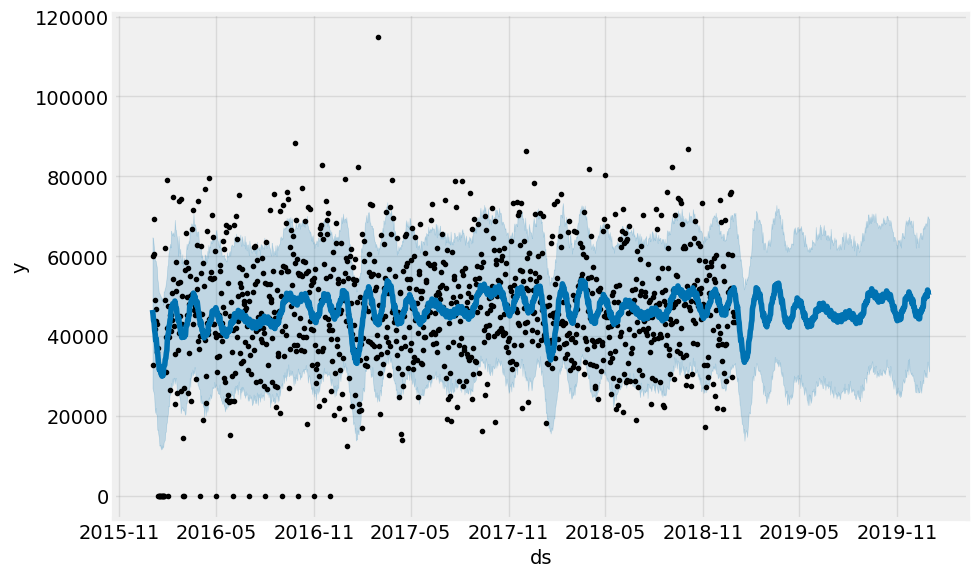

In [11]:
#plot the forecast
fig1 = m.plot(forecast)


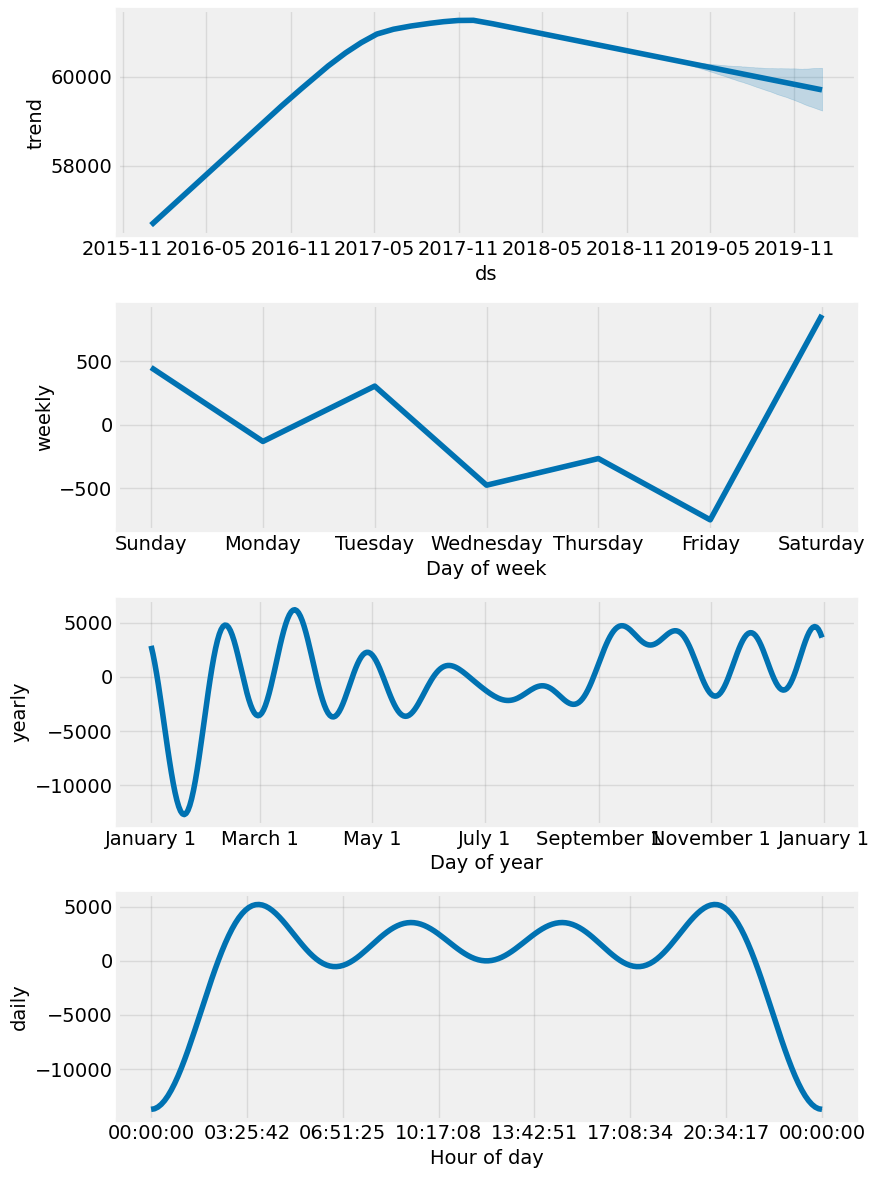

In [12]:
fig2 = m.plot_components(forecast)


In [14]:
# categories
unique_categories = df['Product_Category'].unique()
unique_categories

array(['Electronics', 'Books', 'Clothing', 'Home and kitchen', 'Footwear',
       'Bags'], dtype=object)

In [15]:
# Initialize a dictionary to store the models
models = {}

In [17]:
for category in unique_categories:
    # Filter the data
    df_filtered = df[df['Product_Category'] == category]
    df_daily = df_filtered.resample('D').sum().reset_index()
    
    df_prophet = df_daily.rename(columns={'Txn_date': 'ds', 'Total_Amt': 'y'})

    # Initialize and fit the model
    m = Prophet(daily_seasonality=True)
    m.fit(df_prophet)

    # Store the model
    models[category] = m

/var/folders/wd/2sf_363j2qgdyy46qr3rysph0000gn/T/ipykernel_88270/1178625639.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_daily = df_filtered.resample('D').sum().reset_index()
12:48:55 - cmdstanpy - INFO - Chain [1] start processing
12:48:55 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/wd/2sf_363j2qgdyy46qr3rysph0000gn/T/ipykernel_88270/1178625639.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_daily = df_filtered.resample('D').sum().reset_index()
12:48:55 - cmdstanpy - INFO - Chain [1] start processing
12:48:55 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/wd/2sf_

In [18]:
# Initialize a dictionary to store the forecasts
forecasts = {}

for category, model in models.items():
    # Create future dataframe
    future = model.make_future_dataframe(periods=365)

    # Predict
    forecast = model.predict(future)

    # Store the forecast
    forecasts[category] = forecast


Forecast for category: Electronics


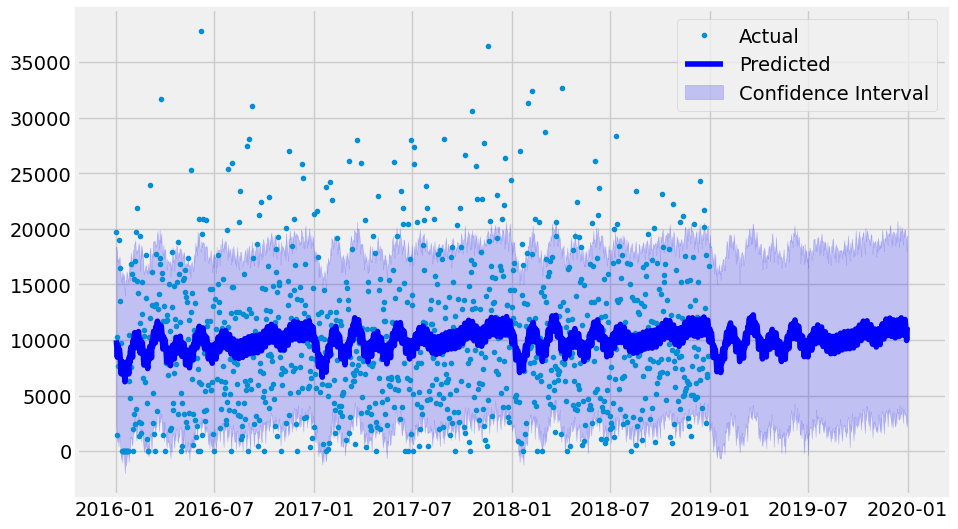

Forecast for category: Books


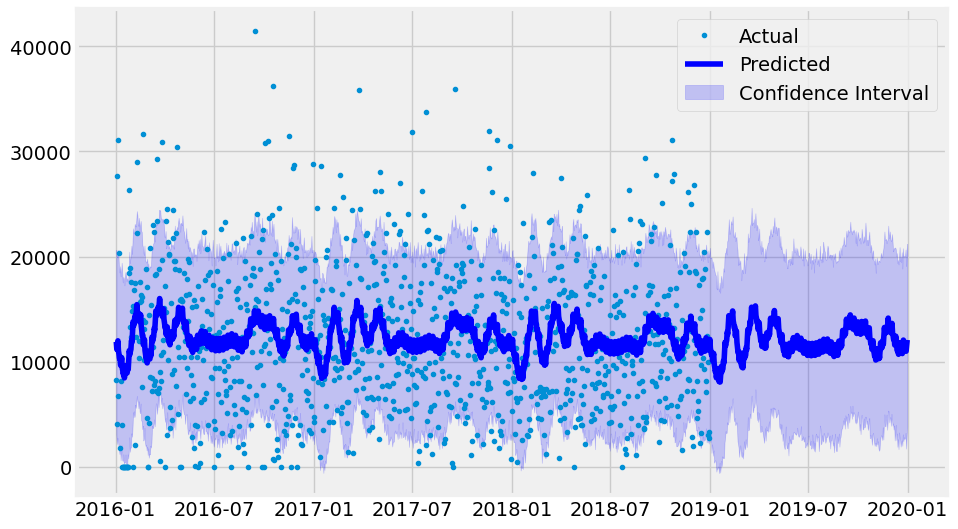

Forecast for category: Clothing


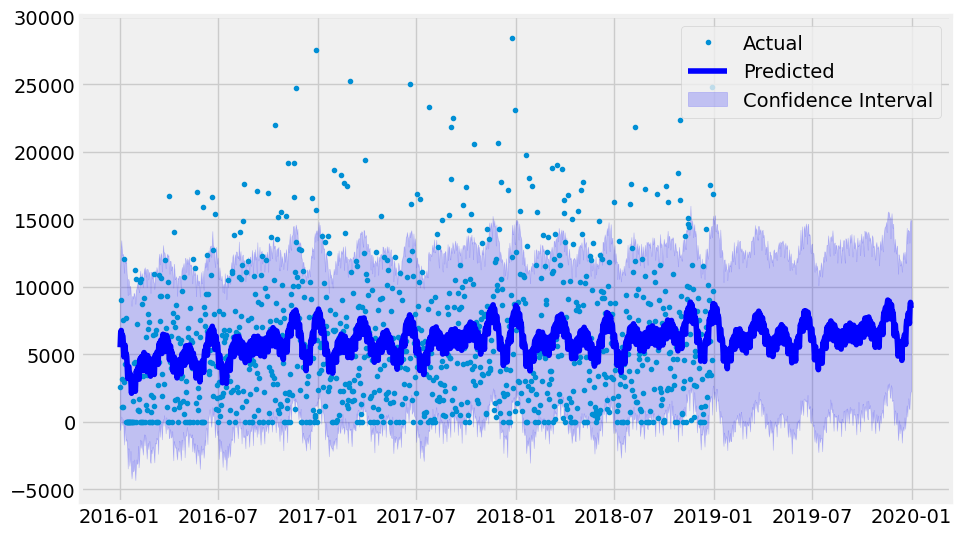

Forecast for category: Home and kitchen


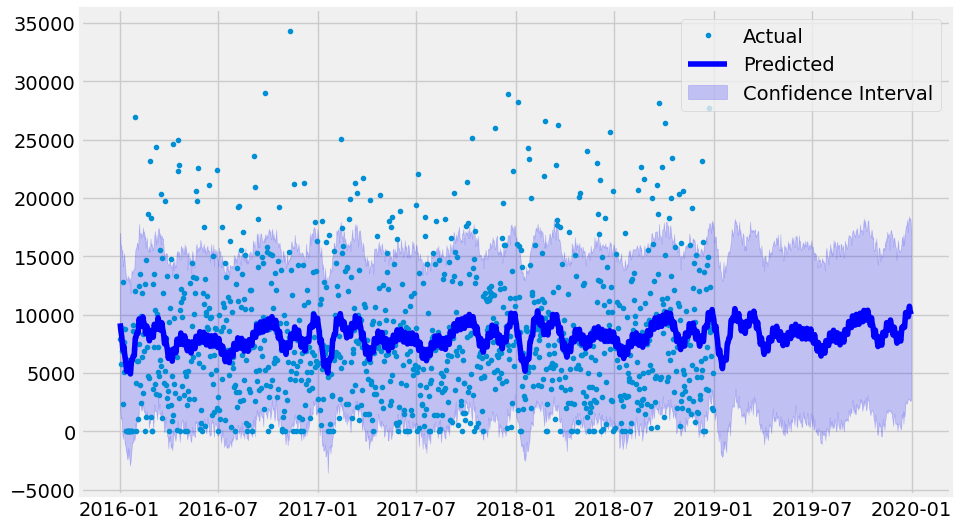

Forecast for category: Footwear


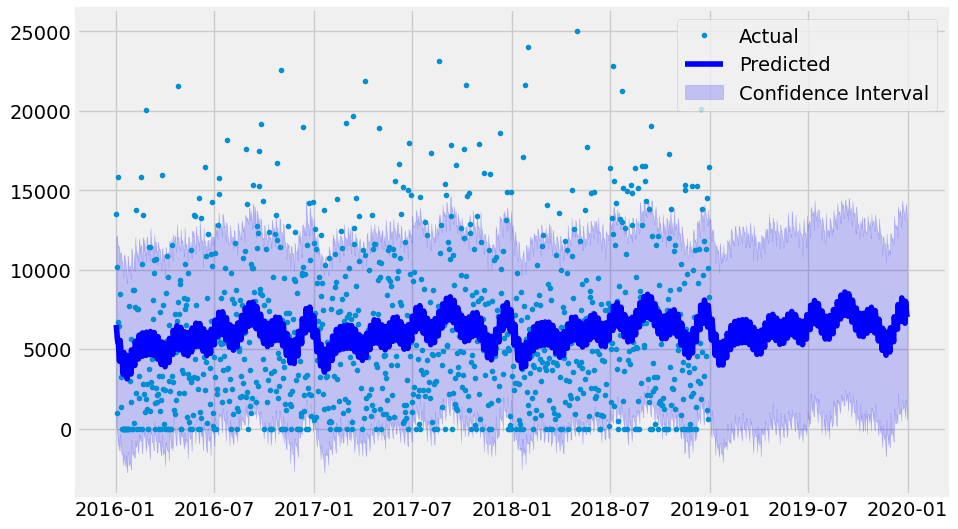

Forecast for category: Bags


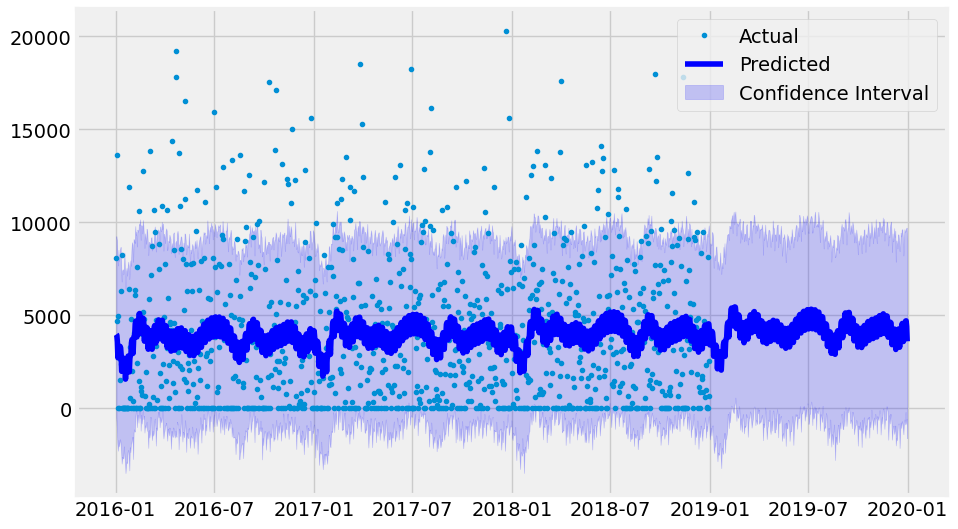

In [27]:

for category, forecast in forecasts.items():
    print(f"Forecast for category: {category}")
    model = models[category]
    
    fig = plt.figure(facecolor='w', figsize=(10, 6))
    ax = fig.add_subplot(111)
    ax.plot(model.history['ds'], model.history['y'], '.', label='Actual')
    ax.plot(forecast['ds'], forecast['yhat'], ls='-', c='blue', label='Predicted')
    ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='blue', alpha=0.2, label='Confidence Interval')
    ax.legend(loc='best')
    plt.show()


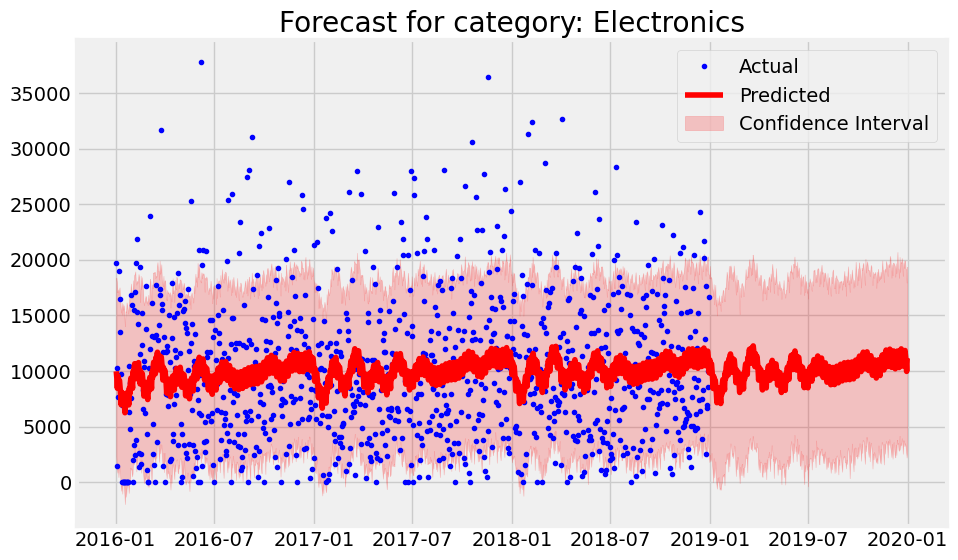

In [28]:
# Forecast for 'Electronics'
category = 'Electronics'
forecast = forecasts[category]
model = models[category]

fig = plt.figure(facecolor='w', figsize=(10, 6))
ax = fig.add_subplot(111)
ax.plot(model.history['ds'], model.history['y'], '.', label='Actual', color='blue')
ax.plot(forecast['ds'], forecast['yhat'], ls='-', c='red', label='Predicted')
ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='red', alpha=0.2, label='Confidence Interval')
ax.legend(loc='best')
plt.title(f"Forecast for category: {category}")
plt.show()

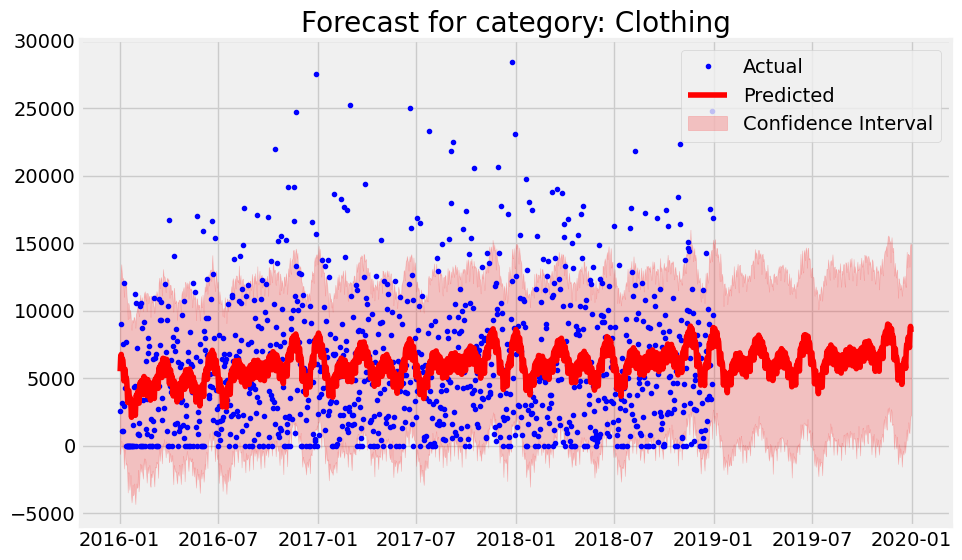

In [29]:
 # Forecast for 'Clothing'
category = 'Clothing'
forecast = forecasts[category]
model = models[category]

fig = plt.figure(facecolor='w', figsize=(10, 6))
ax = fig.add_subplot(111)
ax.plot(model.history['ds'], model.history['y'], '.', label='Actual', color='blue')
ax.plot(forecast['ds'], forecast['yhat'], ls='-', c='red', label='Predicted')
ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='red', alpha=0.2, label='Confidence Interval')
ax.legend(loc='best')
plt.title(f"Forecast for category: {category}")
plt.show()

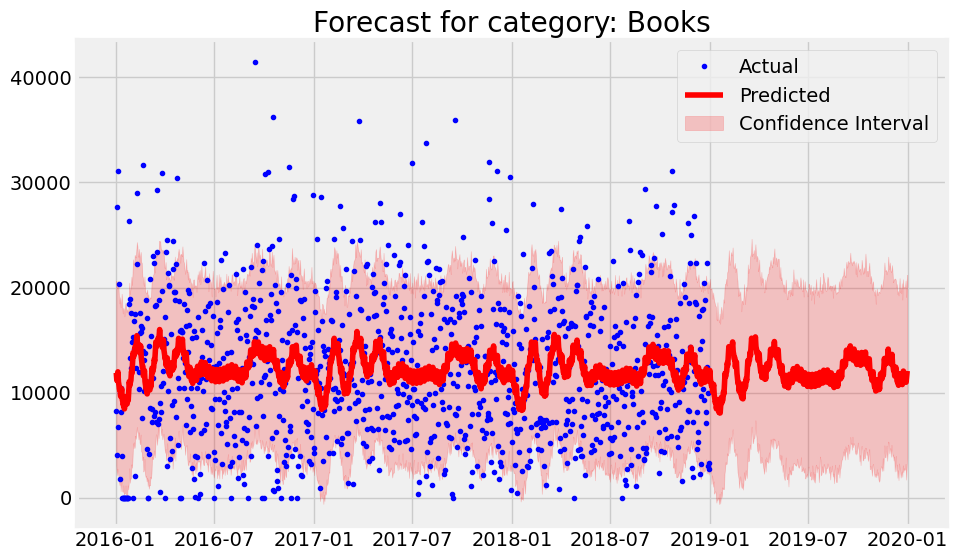

In [31]:
# Forecast for 'Books'
category = 'Books'
forecast = forecasts[category]
model = models[category]

fig = plt.figure(facecolor='w', figsize=(10, 6))
ax = fig.add_subplot(111)
ax.plot(model.history['ds'], model.history['y'], '.', label='Actual', color='blue')
ax.plot(forecast['ds'], forecast['yhat'], ls='-', c='red', label='Predicted')
ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='red', alpha=0.2, label='Confidence Interval')
ax.legend(loc='best')
plt.title(f"Forecast for category: {category}")
plt.show()

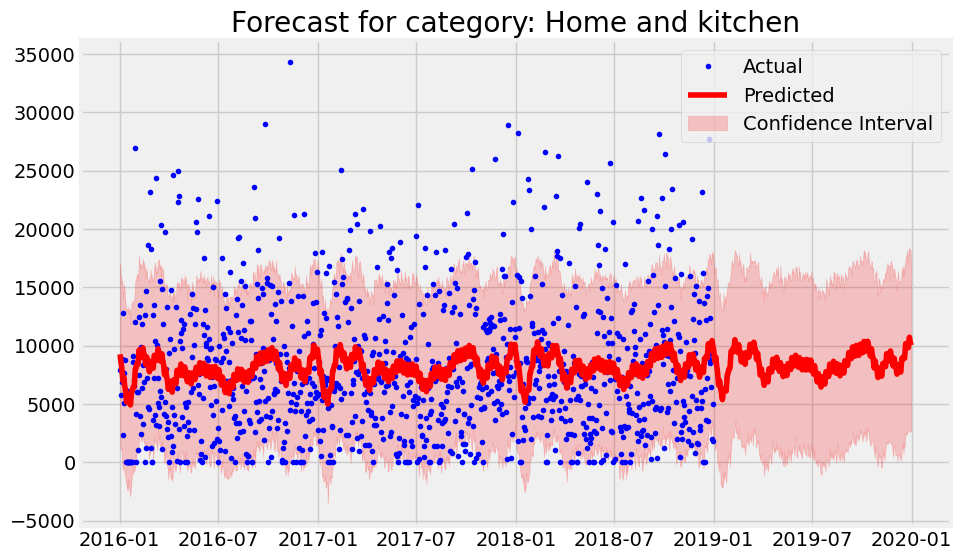

In [32]:
# Forecast for 'Home and kitchen'
category = 'Home and kitchen'
forecast = forecasts[category]
model = models[category]

fig = plt.figure(facecolor='w', figsize=(10, 6))
ax = fig.add_subplot(111)
ax.plot(model.history['ds'], model.history['y'], '.', label='Actual', color='blue')
ax.plot(forecast['ds'], forecast['yhat'], ls='-', c='red', label='Predicted')
ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='red', alpha=0.2, label='Confidence Interval')
ax.legend(loc='best')
plt.title(f"Forecast for category: {category}")
plt.show()

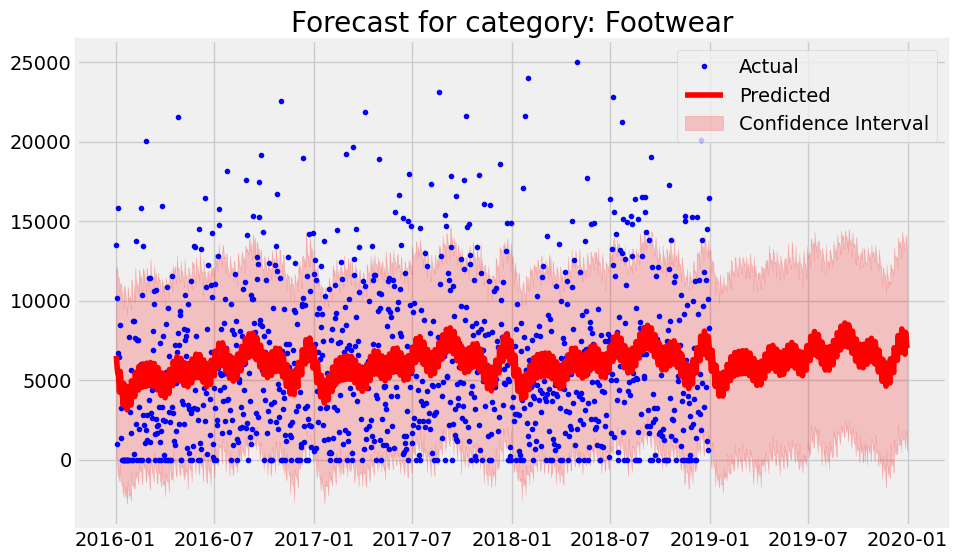

In [33]:
# Forecast for 'Footwear'
category = 'Footwear'
forecast = forecasts[category]
model = models[category]

fig = plt.figure(facecolor='w', figsize=(10, 6))
ax = fig.add_subplot(111)
ax.plot(model.history['ds'], model.history['y'], '.', label='Actual', color='blue')
ax.plot(forecast['ds'], forecast['yhat'], ls='-', c='red', label='Predicted')
ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='red', alpha=0.2, label='Confidence Interval')
ax.legend(loc='best')
plt.title(f"Forecast for category: {category}")
plt.show()

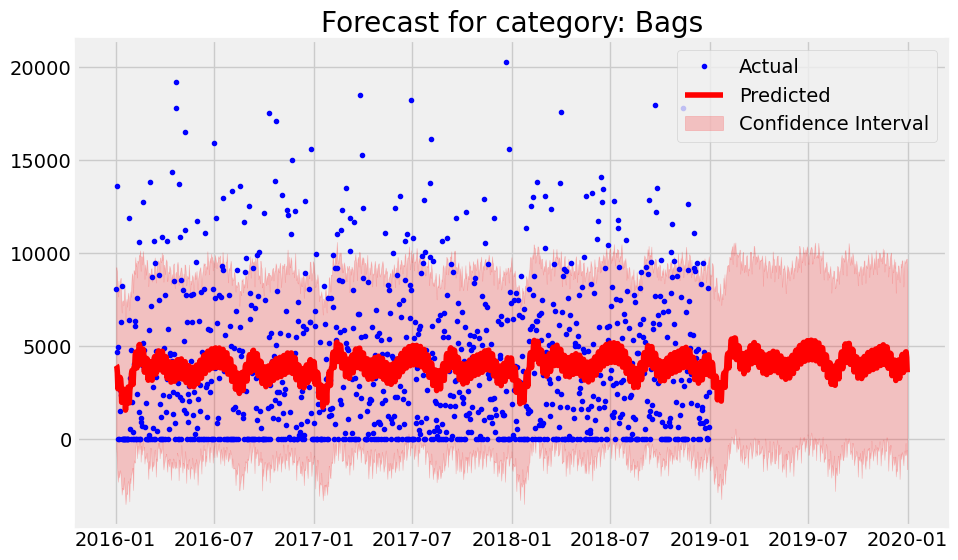

In [34]:
# Forecast for 'Bags'
category = 'Bags'
forecast = forecasts[category]
model = models[category]

fig = plt.figure(facecolor='w', figsize=(10, 6))
ax = fig.add_subplot(111)
ax.plot(model.history['ds'], model.history['y'], '.', label='Actual', color='blue')
ax.plot(forecast['ds'], forecast['yhat'], ls='-', c='red', label='Predicted')
ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='red', alpha=0.2, label='Confidence Interval')
ax.legend(loc='best')
plt.title(f"Forecast for category: {category}")
plt.show()

In [35]:
ds

NameError: name 'ds' is not defined

In [37]:

forecast = models['Electronics'].predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-02,17672.181617,2130.685018,18150.418216,17672.181617,17672.181617,-7706.914169,-7706.914169,-7706.914169,-8115.23736,...,174.509172,174.509172,174.509172,233.814019,233.814019,233.814019,0.0,0.0,0.0,9965.267448
1,2016-01-03,17673.224491,1461.487899,17792.257845,17673.224491,17673.224491,-8299.094101,-8299.094101,-8299.094101,-8115.23736,...,-225.767298,-225.767298,-225.767298,41.910557,41.910557,41.910557,0.0,0.0,0.0,9374.130389
2,2016-01-04,17674.267365,614.595286,16658.381522,17674.267365,17674.267365,-9234.718170,-9234.718170,-9234.718170,-8115.23736,...,-957.520216,-957.520216,-957.520216,-161.960594,-161.960594,-161.960594,0.0,0.0,0.0,8439.549195
3,2016-01-05,17675.310238,1785.438064,17767.289024,17675.310238,17675.310238,-8131.554986,-8131.554986,-8131.554986,-8115.23736,...,358.660801,358.660801,358.660801,-374.978428,-374.978428,-374.978428,0.0,0.0,0.0,9543.755252
4,2016-01-06,17676.353112,-205.479700,16436.230914,17676.353112,17676.353112,-9087.419065,-9087.419065,-9087.419065,-8115.23736,...,-378.216790,-378.216790,-378.216790,-593.964915,-593.964915,-593.964915,0.0,0.0,0.0,8588.934047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,2019-12-27,18314.569162,3394.246646,19975.291087,18265.288551,18362.682294,-6475.685461,-6475.685461,-6475.685461,-8115.23736,...,607.969496,607.969496,607.969496,1031.582403,1031.582403,1031.582403,0.0,0.0,0.0,11838.883701
1456,2019-12-28,18314.423131,3631.418716,19629.096491,18265.003995,18362.904125,-6995.058079,-6995.058079,-6995.058079,-8115.23736,...,174.509172,174.509172,174.509172,945.670109,945.670109,945.670109,0.0,0.0,0.0,11319.365052
1457,2019-12-29,18314.277100,2398.822514,18307.762258,18264.719438,18363.121788,-7500.572110,-7500.572110,-7500.572110,-8115.23736,...,-225.767298,-225.767298,-225.767298,840.432548,840.432548,840.432548,0.0,0.0,0.0,10813.704990
1458,2019-12-30,18314.131070,2225.466848,18862.289914,18264.448292,18363.339450,-8356.873013,-8356.873013,-8356.873013,-8115.23736,...,-957.520216,-957.520216,-957.520216,715.884562,715.884562,715.884562,0.0,0.0,0.0,9957.258056


In [42]:
# Get date column name in your original df
date_col_name = df.index.name

# Convert date index to column for the merge operation
df.reset_index(level=0, inplace=True)

# extract necessary columns
df_original = df[[date_col_name, 'Total_Amt']]
forecast_extracted = forecast[['ds', 'yhat']]

# merge dataframes on the date column
df_merged = pd.merge(df_original, forecast_extracted, how='outer', left_on=date_col_name, right_on='ds')

# remove extra date column and rename columns for clarity
df_merged.drop(columns='ds', inplace=True)
df_merged.rename(columns={'Total_Amt': 'Actual', 'yhat': 'Predicted'}, inplace=True)

print(df_merged)



ValueError: cannot insert level_0, already exists

In [54]:
# Ensure Txn_date is in datetime format
df_merged['Txn_date'] = pd.to_datetime(df_merged['Txn_date'])

# Create the date range
start_date = '2018-07-01'
end_date = '2019-07-31'

# Filter rows based on the date range
filtered_df = df_merged.loc[(df['Txn_date'] >= start_date) & (df_merged['Txn_date'] <= end_date)]

# Print the filtered DataFrame
print(filtered_df)



        Txn_date    Actual    Predicted
16336 2018-07-01  2201.160  9281.774815
16337 2018-07-01  1408.875  9281.774815
16338 2018-07-01  3690.700  9281.774815
16339 2018-07-01  1993.420  9281.774815
16340 2018-07-01   832.065  9281.774815
...          ...       ...          ...
19771 2018-12-31  2794.545  9828.376966
19772 2018-12-31  1176.825  9828.376966
19773 2018-12-31  2045.355  9828.376966
19774 2018-12-31   474.045  9828.376966
19775 2018-12-31  2914.990  9828.376966

[3440 rows x 3 columns]
